<a href="https://colab.research.google.com/github/AI-fanatic24/ASD-DS-AI-ML-Internship/blob/main/Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
'''
person_age	Age of the person	Float
person_gender	Gender of the person	Categorical
person_education	Highest education level	Categorical
person_income	Annual income	Float
person_emp_exp	Years of employment experience	Integer
person_home_ownership	Home ownership status (e.g., rent, own, mortgage)	Categorical
loan_amnt	Loan amount requested	Float
loan_intent	Purpose of the loan	Categorical
loan_int_rate	Loan interest rate	Float
loan_percent_income	Loan amount as a percentage of annual income	Float
cb_person_cred_hist_length	Length of credit history in years	Float
credit_score	Credit score of the person	Integer
previous_loan_defaults_on_file	Indicator of previous loan defaults	Categorical
loan_status (target variable)	Loan approval status: 1 = approved; 0 = rejected	Integer
'''

'\nperson_age\tAge of the person\tFloat\nperson_gender\tGender of the person\tCategorical\nperson_education\tHighest education level\tCategorical\nperson_income\tAnnual income\tFloat\nperson_emp_exp\tYears of employment experience\tInteger\nperson_home_ownership\tHome ownership status (e.g., rent, own, mortgage)\tCategorical\nloan_amnt\tLoan amount requested\tFloat\nloan_intent\tPurpose of the loan\tCategorical\nloan_int_rate\tLoan interest rate\tFloat\nloan_percent_income\tLoan amount as a percentage of annual income\tFloat\ncb_person_cred_hist_length\tLength of credit history in years\tFloat\ncredit_score\tCredit score of the person\tInteger\nprevious_loan_defaults_on_file\tIndicator of previous loan defaults\tCategorical\nloan_status (target variable)\tLoan approval status: 1 = approved; 0 = rejected\tInteger\n'

In [17]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [18]:
#Loading and Reading the dataset
df = pd.read_csv('loan.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1


In [19]:
#Displaying information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      3999 non-null   int64  
 1   person_gender                   3999 non-null   object 
 2   person_education                3999 non-null   object 
 3   person_income                   3999 non-null   int64  
 4   person_emp_exp                  3999 non-null   int64  
 5   person_home_ownership           3999 non-null   object 
 6   loan_amnt                       3999 non-null   int64  
 7   loan_intent                     3999 non-null   object 
 8   loan_int_rate                   3999 non-null   float64
 9   loan_percent_income             3999 non-null   float64
 10  cb_person_cred_hist_length      3999 non-null   int64  
 11  credit_score                    3999 non-null   int64  
 12  previous_loan_defaults_on_file  39

In [20]:
#Checking for null values
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


**We can conclude there are no missing/null values**

In [21]:
#Displaying the count of each target label
# 1 - Loan Approved
# 0 - Loan Declined
df['loan_status'].value_counts()

,count
loan_status,
0,2657
1,1342


**We observe imbalance in the target labels**

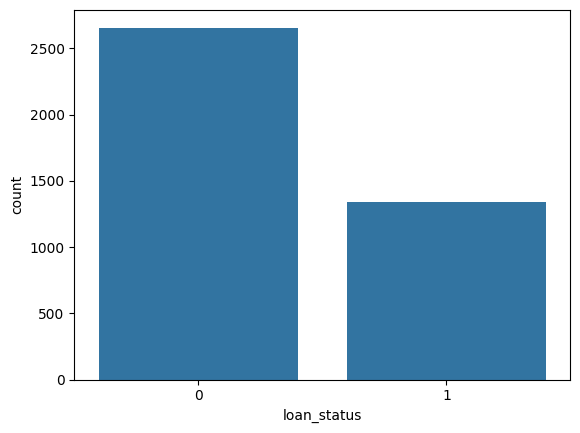

In [22]:
#Plotting the value counts of each target label
sns.countplot(df,x='loan_status')
plt.show()

In [23]:
#Displaying all the columns in the dataframe
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [24]:
#Extracting categorical columns from the dataframe
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


In [25]:
#Printing unique values in each categorical column
print(df['person_gender'].unique())
print(df['person_education'].unique())
print(df['person_home_ownership'].unique())
print(df['loan_intent'].unique())
print(df['previous_loan_defaults_on_file'].unique())

['female' 'male']
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
['No' 'Yes']


In [26]:
#One-Hot Encoding the categorical variables named 'person_gender' and 'previous_loan_defaults_on_file' with drop_first=True parameter.
df = pd.get_dummies(df,columns=['person_gender','previous_loan_defaults_on_file'],drop_first=True,dtype=int)
df.head()

,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,previous_loan_defaults_on_file_Yes
0,22,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,1,0,0
1,21,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,0,0,1
2,25,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,1,0,0
3,23,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,1,0,0
4,24,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,1,1,0


In [37]:
#One-Hot Encoding the columns names 'person_education', 'person_home_ownership', 'loan_intent in the dataframe
df = pd.get_dummies(df,columns=['person_education','person_home_ownership','loan_intent'],dtype=int)
df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,71948,0,35000,16.02,0.49,3,561,1,0,...,0,0,0,1,0,0,0,0,1,0
1,21,12282,0,1000,11.14,0.08,2,504,0,0,...,0,0,1,0,0,1,0,0,0,0
2,25,12438,3,5500,12.87,0.44,3,635,1,0,...,1,0,0,0,0,0,0,1,0,0
3,23,79753,0,35000,15.23,0.44,2,675,1,0,...,0,0,0,1,0,0,0,1,0,0
4,24,66135,1,35000,14.27,0.53,4,586,1,1,...,0,0,0,1,0,0,0,1,0,0


In [38]:
#Displaying all the columns in the dataframe
df.columns

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status', 'person_gender_male',
       'previous_loan_defaults_on_file_Yes', 'person_education_Associate',
       'person_education_Bachelor', 'person_education_Doctorate',
       'person_education_High School', 'person_education_Master',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

HANDLING IMBALANCE IN THE DATA

In [39]:
# Importing SMOTE from imblearn library
from imblearn.over_sampling import SMOTE

In [40]:
#Balancing the target labels
oversample = SMOTE()
X,y = oversample.fit_resample(df[['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'person_gender_male',
       'previous_loan_defaults_on_file_Yes', 'person_education_Associate',
       'person_education_Bachelor', 'person_education_Doctorate',
       'person_education_High School', 'person_education_Master',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE']],df['loan_status'])
print(X.shape)
print(y.shape)

(5314, 25)
(5314,)


In [41]:
#Creating the final dataframe after handling the imbalance in data
df = pd.concat([X,y],axis=1)
df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_male,previous_loan_defaults_on_file_Yes,...,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_status
0,22,71948,0,35000,16.02,0.49,3,561,0,0,...,0,0,1,0,0,0,0,1,0,1
1,21,12282,0,1000,11.14,0.08,2,504,0,1,...,0,1,0,0,1,0,0,0,0,0
2,25,12438,3,5500,12.87,0.44,3,635,0,0,...,0,0,0,0,0,0,1,0,0,1
3,23,79753,0,35000,15.23,0.44,2,675,0,0,...,0,0,1,0,0,0,1,0,0,1
4,24,66135,1,35000,14.27,0.53,4,586,1,0,...,0,0,1,0,0,0,1,0,0,1


In [42]:
# Checking if data is properly balanced
df['loan_status'].value_counts()

,count
loan_status,
1,2657
0,2657


HANDLING OUTLIERS

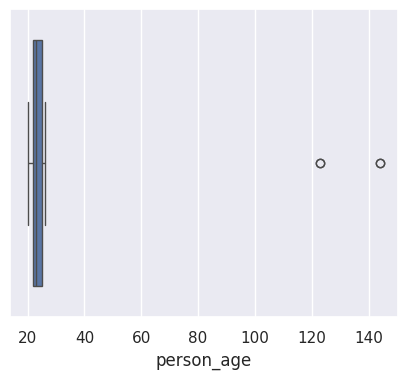

In [43]:
#Checking outliers in Age
sns.set(rc={'figure.figsize':(5,4)})
sns.boxplot(df,x='person_age')
plt.show()

In [44]:
# Filtering the outliers in Age
df[df['person_age']>120]

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_male,previous_loan_defaults_on_file_Yes,...,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_status
81,144,300616,125,4800,13.57,0.02,3,789,1,0,...,0,0,1,0,0,0,0,0,1,0
183,144,241424,121,6000,11.86,0.02,2,807,1,0,...,0,0,0,0,1,0,0,0,0,0
575,123,97140,101,20400,10.25,0.21,3,805,0,1,...,0,0,1,0,1,0,0,0,0,0
747,123,94723,100,20000,11.01,0.21,4,714,1,1,...,0,0,1,0,0,0,0,0,1,0


In [45]:
#Deleting the outliers in Age
df.drop([81,183,575,747],inplace=True)

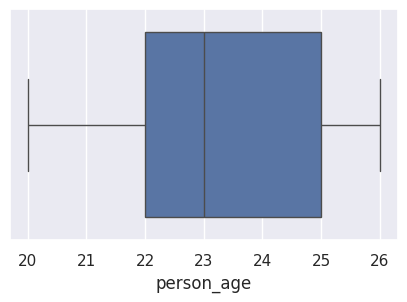

In [46]:
#Checking if outliers are eliminated in Age
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(df,x='person_age')
plt.show()

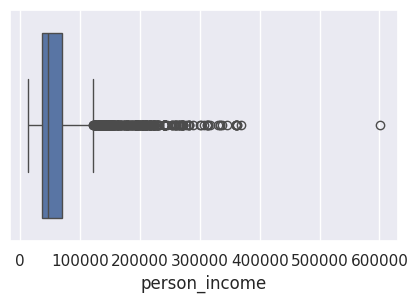

In [47]:
#Checking outliers in income
sns.boxplot(df,x='person_income')
plt.show()

It is common to have outliers in income since the population can come from a diverse range of backgrounds. Here the salaries are valid in real-life scenarios, so the outliers in income are retained

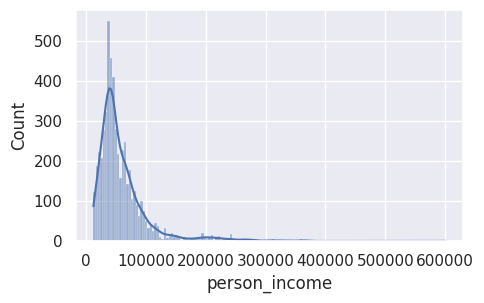

In [48]:
#PLotting histogram for income
sns.histplot(df,x='person_income',kde=True)
plt.show()

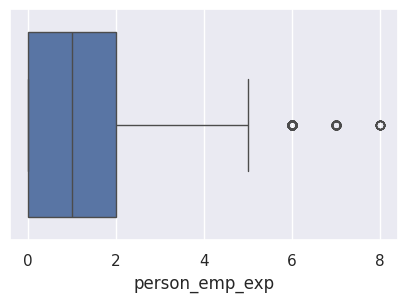

In [49]:
#Checking outliers in years of person's employment experience
sns.boxplot(df,x='person_emp_exp')
plt.show()

People can have varied years of experience and in this case the outlier is justifiable in real-life scanrio so it is retained.

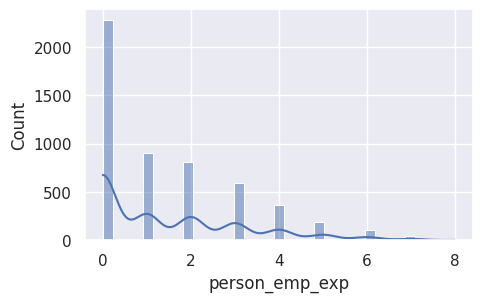

In [50]:
#PLotting histogram for years of person's employment experience
sns.histplot(df,x='person_emp_exp',kde=True)
plt.show()

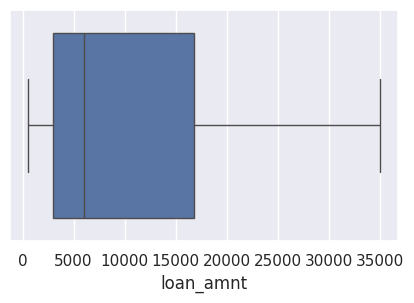

In [51]:
#Checking outliers in loan amount
sns.boxplot(df,x='loan_amnt')
plt.show()

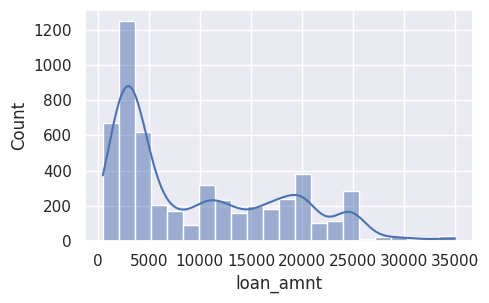

In [52]:
#Plotting histogram for loan amount
sns.histplot(df,x='loan_amnt',kde=True)
plt.show()

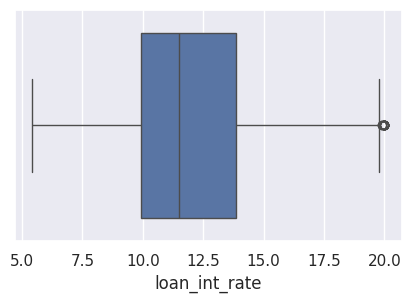

In [53]:
#Checking outliers in interest rate
sns.boxplot(df,x='loan_int_rate')
plt.show()

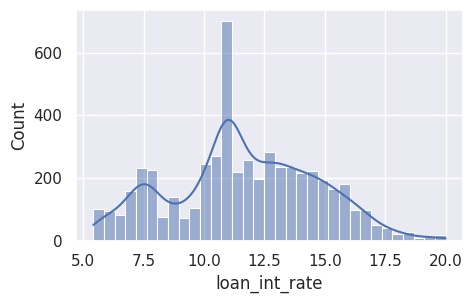

In [54]:
sns.histplot(df,x='loan_int_rate',kde=True)
plt.show()

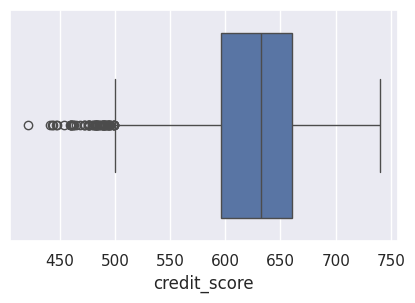

In [55]:
#Checking outliers in credit score
sns.boxplot(df,x='credit_score')
plt.show()

The outliers are poor yet valid credit scores and so can be retained

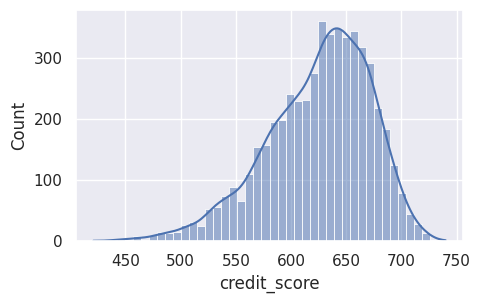

In [56]:
#Plotting histogram for credit score
sns.histplot(df,x='credit_score',kde=True)
plt.show()

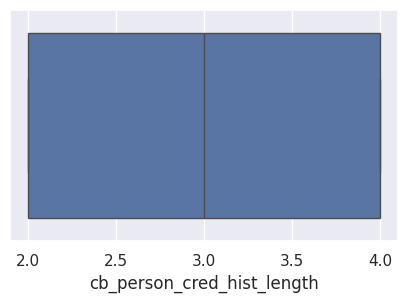

In [57]:
#Checking for outliers in credit history length in years
sns.boxplot(df,x='cb_person_cred_hist_length')
plt.show()

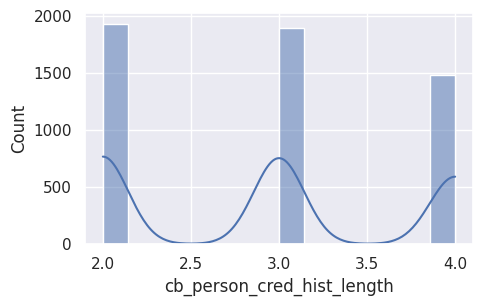

In [58]:
#Plotting histogram for credit history length in years
sns.histplot(df,x='cb_person_cred_hist_length',kde=True)
plt.show()

In [62]:
# Counting number of records per education level
bachelor = int(df[df['person_education_Bachelor']==1].value_counts().sum())
associate = int(df[df['person_education_Associate']==1].value_counts().sum())
doctorate = int(df[df['person_education_Doctorate']==1].value_counts().sum())
high_school = int(df[df['person_education_High School']==1].value_counts().sum())
master = int(df[df['person_education_Master']==1].value_counts().sum())

In [93]:
# Printing the counts
print("Bachelors:",bachelor)
print("Associates:",associate)
print("Doctorates:",doctorate)
print("High Schools:",high_school)
print("Masters:",master)

Bachelors: 1333
Associates: 1110
Doctorates: 8
High Schools: 1245
Masters: 640


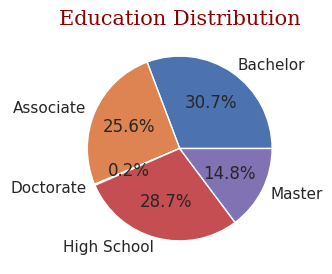

In [94]:
#Visualizing the distribution in education level of the records
plt.pie([bachelor,associate,doctorate,high_school,master],labels=['Bachelor','Associate','Doctorate','High School','Master'],autopct='%1.1f%%')
plt.title("Education Distribution",fontdict={'family':'serif','fontsize':15,'color':'darkred'})
plt.show()

In [76]:
rent = int(df[df['person_home_ownership_RENT']==1].value_counts().sum())
mortgage = int(df[df['person_home_ownership_MORTGAGE']==1].value_counts().sum())
own = int(df[df['person_home_ownership_OWN']==1].value_counts().sum())
other = int(df[df['person_home_ownership_OTHER']==1].value_counts().sum())

In [77]:
print("Rent:",rent)
print("Mortgage:",mortgage)
print("Own:",own)
print("Other:",other)

Rent: 3720
Mortgage: 1008
Own: 338
Other: 16


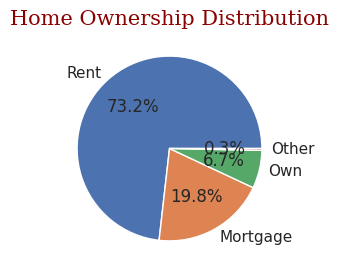

In [78]:
plt.pie([rent,mortgage,own,other],labels=['Rent','Mortgage','Own','Other'],autopct='%1.1f%%')
plt.title("Home Ownership Distribution",fontdict={'family':'serif','fontsize':15,'color':'darkred'})
plt.show()

In [79]:
personal = int(df[df['loan_intent_PERSONAL']==1].value_counts().sum())
debt_consolidation = int(df[df['loan_intent_DEBTCONSOLIDATION']==1].value_counts().sum())
home_improvement = int(df[df['loan_intent_HOMEIMPROVEMENT']==1].value_counts().sum())
medical = int(df[df['loan_intent_MEDICAL']==1].value_counts().sum())
venture = int(df[df['loan_intent_VENTURE']==1].value_counts().sum())
education = int(df[df['loan_intent_EDUCATION']==1].value_counts().sum())

In [80]:
print("Personal:",personal)
print("Debt Consolidation:",debt_consolidation)
print("Home Improvement:",home_improvement)
print("Medical:",medical)
print("Venture:",venture)
print("Education:",education)

Personal: 682
Debt Consolidation: 719
Home Improvement: 391
Medical: 798
Venture: 727
Education: 931


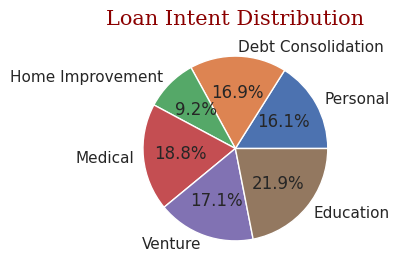

In [81]:
plt.pie([personal,debt_consolidation,home_improvement,medical,venture,education],labels=['Personal','Debt Consolidation','Home Improvement','Medical','Venture','Education'],autopct='%1.1f%%')
plt.title("Loan Intent Distribution",fontdict={'family':'serif','fontsize':15,'color':'darkred'})
plt.show()

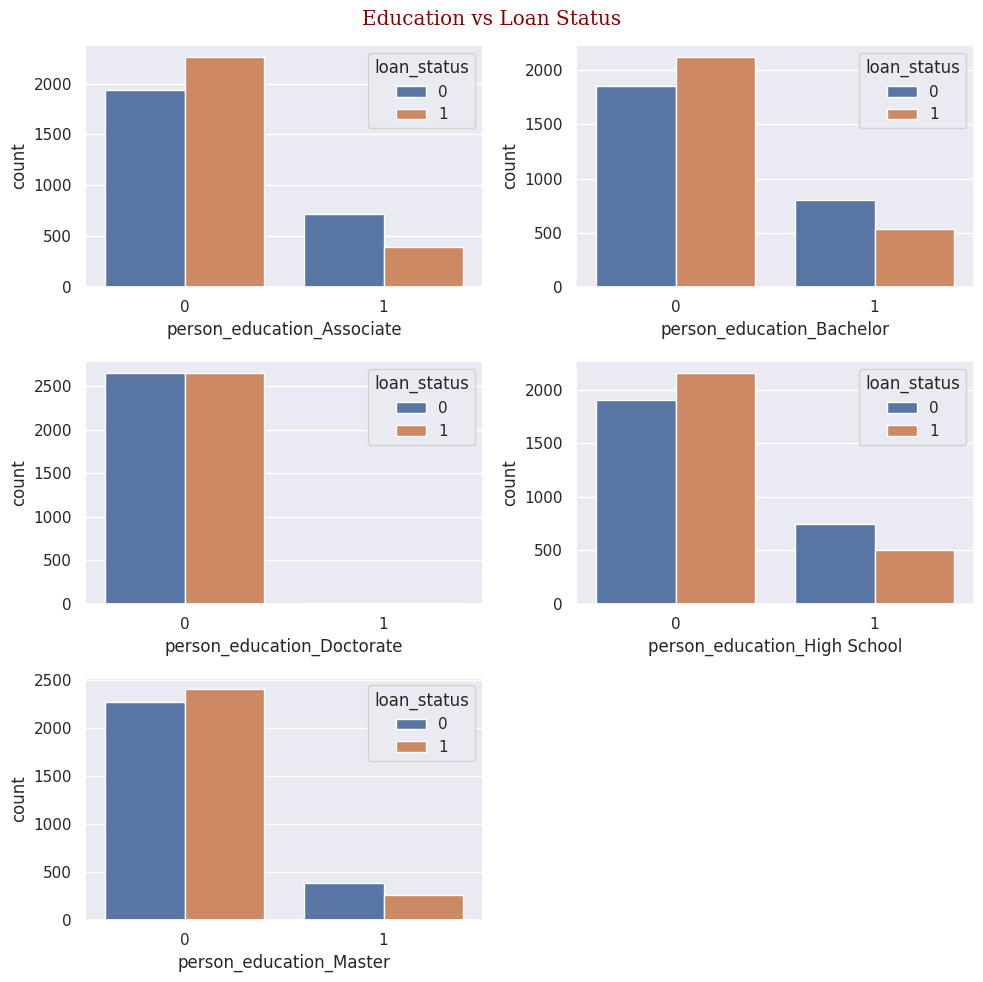

In [82]:
#Visualizing effect of loan status on approval
sns.set(rc={'figure.figsize':(10,10)})

plt.subplot(3,2,1)
sns.countplot(df,x='person_education_Associate',hue='loan_status')
plt.subplot(3,2,2)
sns.countplot(df,x='person_education_Bachelor',hue='loan_status')
plt.subplot(3,2,3)
sns.countplot(df,x='person_education_Doctorate',hue='loan_status')
plt.subplot(3,2,4)
sns.countplot(df,x='person_education_High School',hue='loan_status')
plt.subplot(3,2,5)
sns.countplot(df,x='person_education_Master',hue='loan_status')

plt.suptitle('Education vs Loan Status',fontdict={'family':'serif','fontsize':20,'color':'darkred','fontweight':'bold'})

plt.tight_layout()

plt.show()

In [83]:
#Displaying the records of people with Doctorate degree
df[df['person_education_Doctorate'] == 1]

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_male,previous_loan_defaults_on_file_Yes,...,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_status
143,26,56325,2,25000,11.86,0.44,4,690,0,0,...,0,0,1,1,0,0,0,0,0,1
1009,26,29960,5,5000,7.66,0.17,3,664,1,0,...,0,0,0,0,0,0,1,0,0,1
1202,26,31059,3,11500,7.88,0.37,3,682,0,1,...,0,1,0,0,0,0,0,0,1,0
2130,26,36905,2,4000,13.16,0.11,4,644,0,0,...,0,0,0,0,0,0,0,0,1,0
2421,26,146163,4,2500,7.66,0.02,4,660,1,0,...,0,0,1,0,1,0,0,0,0,0
2581,26,40961,5,3000,11.12,0.07,2,701,0,0,...,0,0,1,0,1,0,0,0,0,0
2794,26,70598,7,12000,9.91,0.17,3,571,1,1,...,0,0,1,1,0,0,0,0,0,0
3015,26,35793,3,11200,11.14,0.31,4,708,0,0,...,0,0,0,0,0,1,0,0,0,1


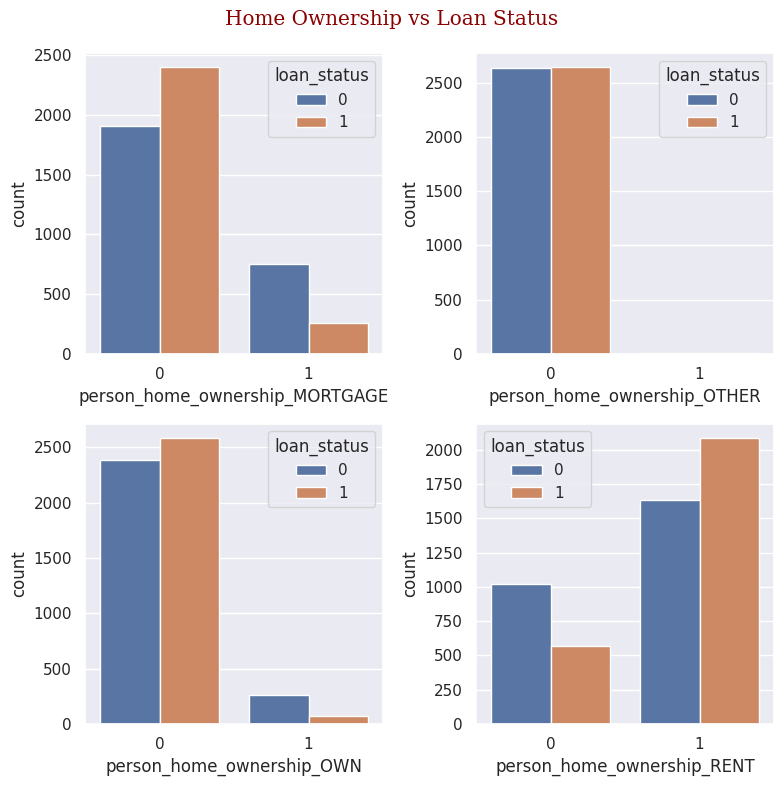

In [84]:
#Visualizing effect of type of home ownership on loan approval
sns.set(rc={'figure.figsize':(8,8)})

plt.subplot(2,2,1)
sns.countplot(df,x='person_home_ownership_MORTGAGE',hue='loan_status')
plt.subplot(2,2,2)
sns.countplot(df,x='person_home_ownership_OTHER',hue='loan_status')
plt.subplot(2,2,3)
sns.countplot(df,x='person_home_ownership_OWN',hue='loan_status')
plt.subplot(2,2,4)
sns.countplot(df,x='person_home_ownership_RENT',hue='loan_status')

plt.suptitle('Home Ownership vs Loan Status',fontdict={'family':'serif','fontsize':20,'color':'darkred','fontweight':'bold'})

plt.tight_layout()

plt.show()

In [85]:
#Displaying records of people with 'OTHER' type of home ownership
df[df['person_home_ownership_OTHER'] == 1]

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_male,previous_loan_defaults_on_file_Yes,...,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_status
29,21,14988,0,4000,12.84,0.27,2,553,0,0,...,1,0,0,0,1,0,0,0,0,1
566,26,24183,5,7500,11.97,0.31,2,621,0,0,...,1,0,0,0,0,0,0,1,0,1
715,24,25826,4,6000,12.21,0.23,2,655,0,0,...,1,0,0,0,0,0,0,1,0,0
880,21,28319,0,2400,12.21,0.08,4,628,1,1,...,1,0,0,0,1,0,0,0,0,0
1308,22,31844,0,3000,9.45,0.09,3,560,1,0,...,1,0,0,1,0,0,0,0,0,0
1503,25,33366,1,8000,15.05,0.24,2,579,0,0,...,1,0,0,0,0,0,1,0,0,1
1527,21,34395,0,3500,14.42,0.10,4,621,0,0,...,1,0,0,0,0,0,1,0,0,1
1638,24,34450,4,9000,10.83,0.26,3,562,0,0,...,1,0,0,0,1,0,0,0,0,1
1818,23,36430,0,3000,9.32,0.08,3,578,1,0,...,1,0,0,0,0,0,0,0,1,0
2351,26,39462,2,6500,11.01,0.16,4,614,1,0,...,1,0,0,0,0,0,0,0,1,0


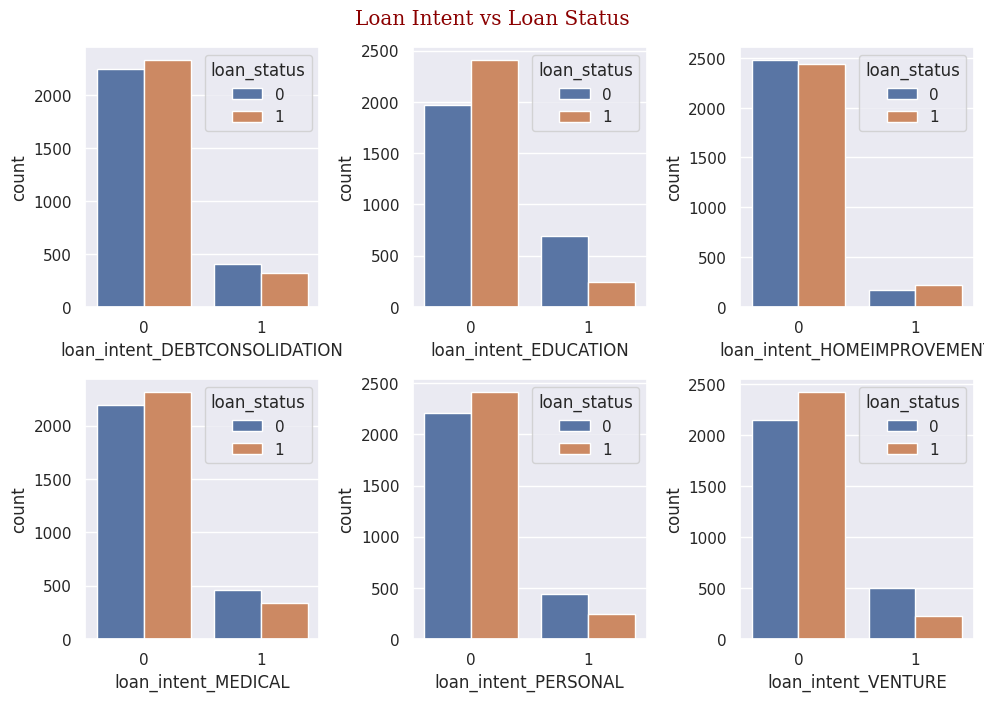

In [86]:
#Visualizing effect of loan intent on loan approval
sns.set(rc={'figure.figsize':(10,10)})

plt.subplot(3,3,1)
sns.countplot(df,x='loan_intent_DEBTCONSOLIDATION',hue='loan_status')
plt.subplot(3,3,2)
sns.countplot(df,x='loan_intent_EDUCATION',hue='loan_status')
plt.subplot(3,3,3)
sns.countplot(df,x='loan_intent_HOMEIMPROVEMENT',hue='loan_status')
plt.subplot(3,3,4)
sns.countplot(df,x='loan_intent_MEDICAL',hue='loan_status')
plt.subplot(3,3,5)
sns.countplot(df,x='loan_intent_PERSONAL',hue='loan_status')
plt.subplot(3,3,6)
sns.countplot(df,x='loan_intent_VENTURE',hue='loan_status')

plt.suptitle('Loan Intent vs Loan Status',fontdict={'family':'serif','fontsize':20,'color':'darkred','fontweight':'bold'})

plt.tight_layout()

plt.show()

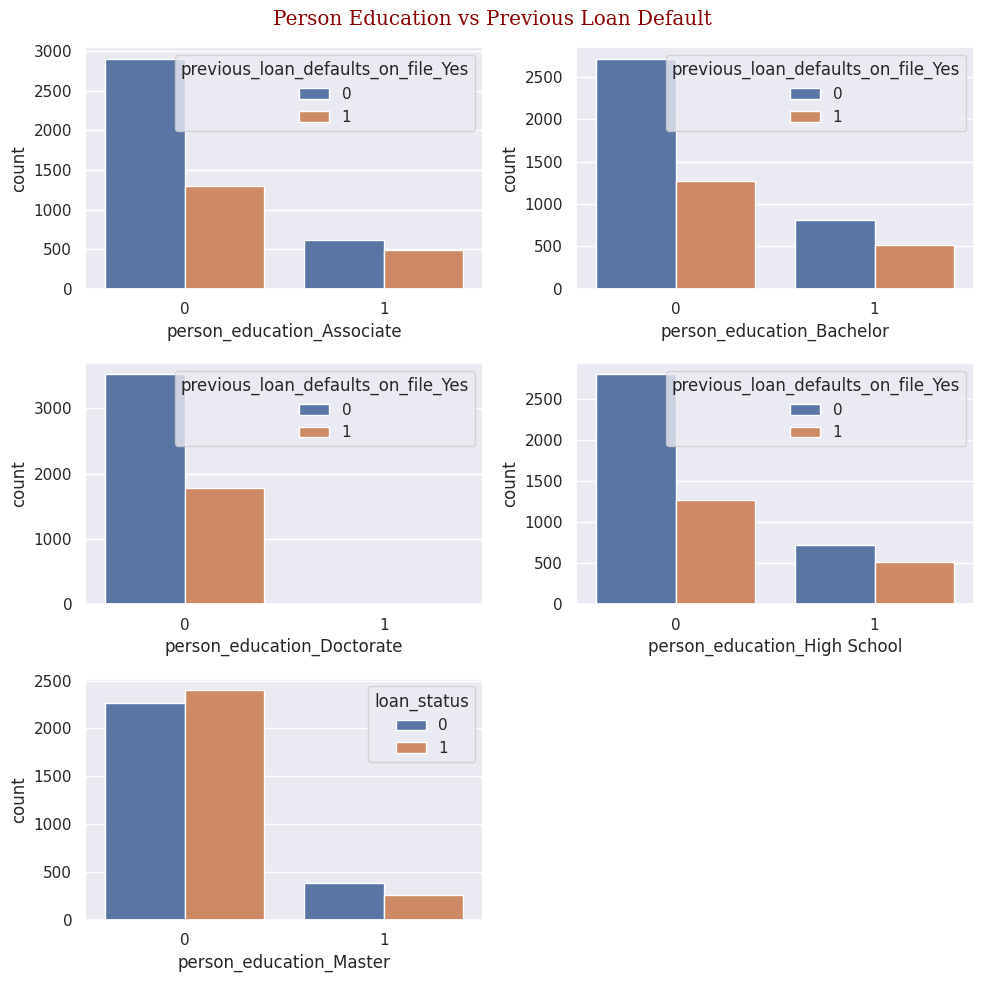

In [87]:
#Visualizing effect of Education on Loan Defaulting
sns.set(rc={'figure.figsize':(10,10)})

plt.subplot(3,2,1)
sns.countplot(df,x='person_education_Associate',hue='previous_loan_defaults_on_file_Yes')
plt.subplot(3,2,2)
sns.countplot(df,x='person_education_Bachelor',hue='previous_loan_defaults_on_file_Yes')
plt.subplot(3,2,3)
sns.countplot(df,x='person_education_Doctorate',hue='previous_loan_defaults_on_file_Yes')
plt.subplot(3,2,4)
sns.countplot(df,x='person_education_High School',hue='previous_loan_defaults_on_file_Yes')
plt.subplot(3,2,5)
sns.countplot(df,x='person_education_Master',hue='loan_status')

plt.suptitle('Person Education vs Previous Loan Default',fontdict={'family':'serif','fontsize':20,'color':'darkred','fontweight':'bold'})

plt.tight_layout()

plt.show()

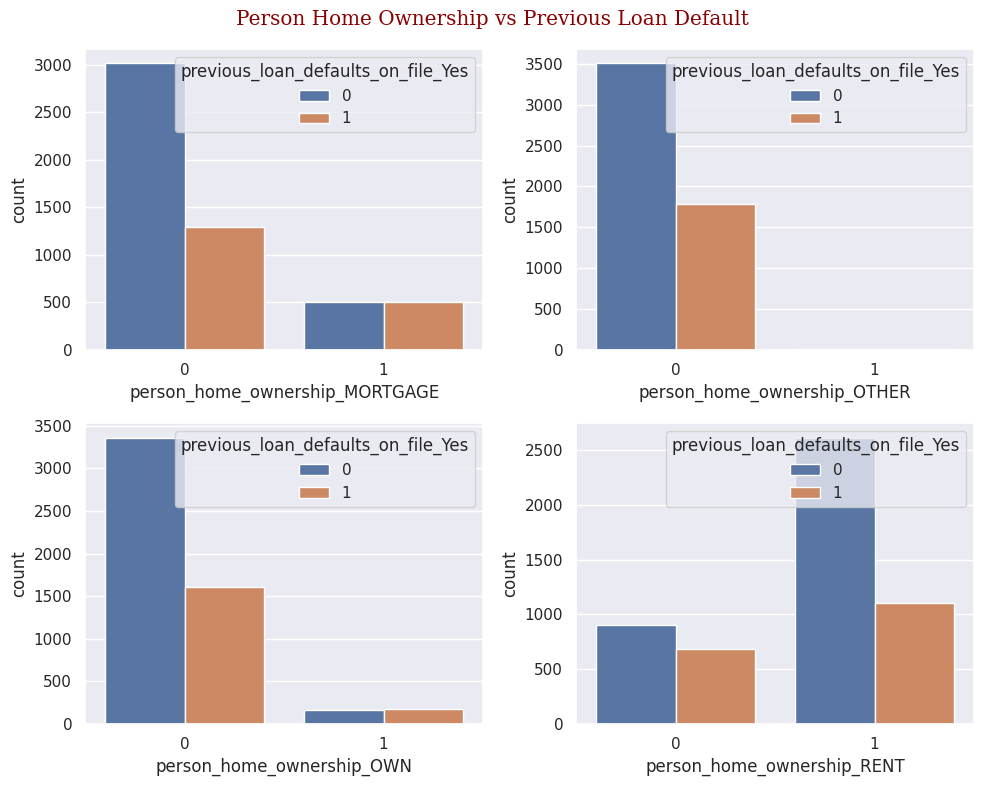

In [88]:
#Visualizing effect of Home Ownership on Loan Defaulting
sns.set(rc={'figure.figsize':(10,8)})

plt.subplot(2,2,1)
sns.countplot(df,x='person_home_ownership_MORTGAGE',hue='previous_loan_defaults_on_file_Yes')
plt.subplot(2,2,2)
sns.countplot(df,x='person_home_ownership_OTHER',hue='previous_loan_defaults_on_file_Yes')
plt.subplot(2,2,3)
sns.countplot(df,x='person_home_ownership_OWN',hue='previous_loan_defaults_on_file_Yes')
plt.subplot(2,2,4)
sns.countplot(df,x='person_home_ownership_RENT',hue='previous_loan_defaults_on_file_Yes')

plt.suptitle('Person Home Ownership vs Previous Loan Default',fontdict={'family':'serif','fontsize':20,'color':'darkred','fontweight':'bold'})

plt.tight_layout()

plt.show()

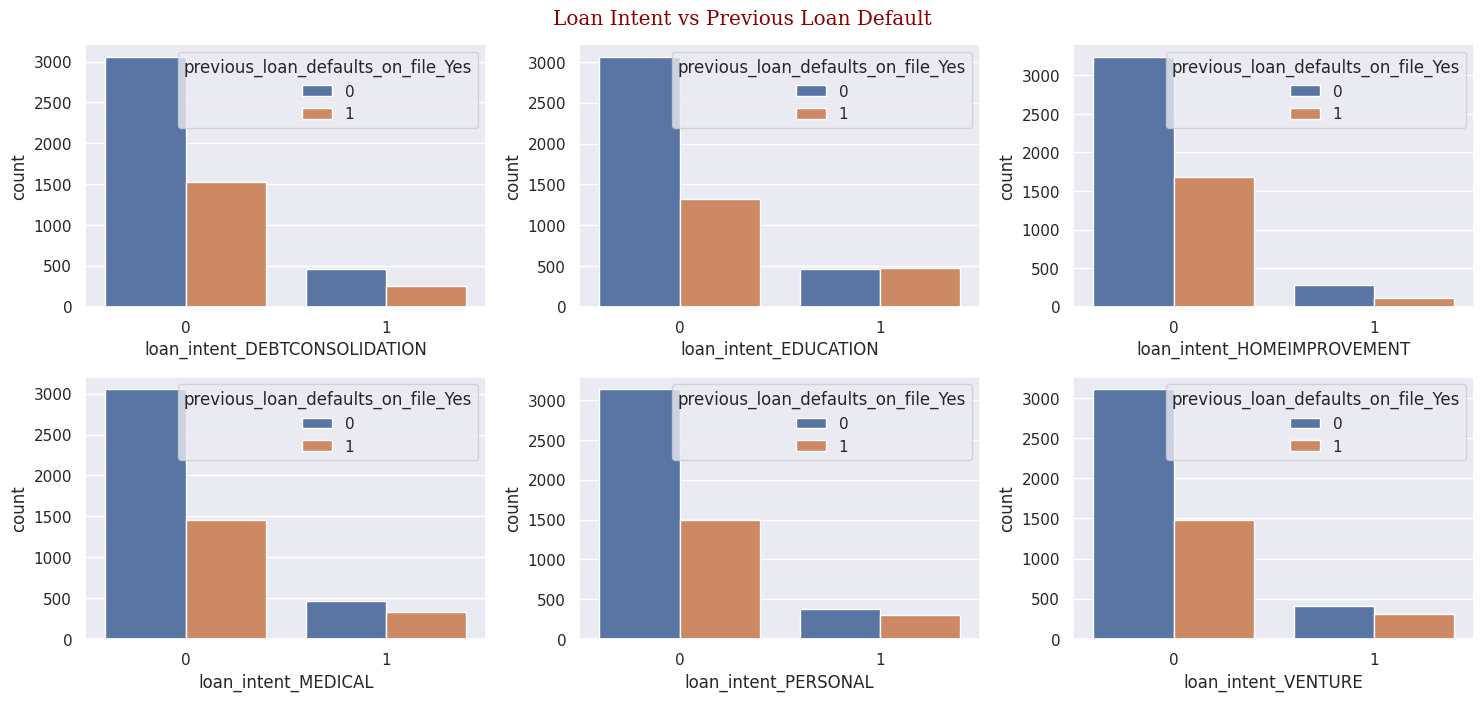

In [89]:
#Visualizing effect of loan intent on loan defaulting
sns.set(rc={'figure.figsize':(15,10)})

plt.subplot(3,3,1)
sns.countplot(df,x='loan_intent_DEBTCONSOLIDATION',hue='previous_loan_defaults_on_file_Yes')
plt.subplot(3,3,2)
sns.countplot(df,x='loan_intent_EDUCATION',hue='previous_loan_defaults_on_file_Yes')
plt.subplot(3,3,3)
sns.countplot(df,x='loan_intent_HOMEIMPROVEMENT',hue='previous_loan_defaults_on_file_Yes')
plt.subplot(3,3,4)
sns.countplot(df,x='loan_intent_MEDICAL',hue='previous_loan_defaults_on_file_Yes')
plt.subplot(3,3,5)
sns.countplot(df,x='loan_intent_PERSONAL',hue='previous_loan_defaults_on_file_Yes')
plt.subplot(3,3,6)
sns.countplot(df,x='loan_intent_VENTURE',hue='previous_loan_defaults_on_file_Yes')

plt.suptitle('Loan Intent vs Previous Loan Default',fontdict={'family':'serif','fontsize':20,'color':'darkred','fontweight':'bold'})

plt.tight_layout()

plt.show()

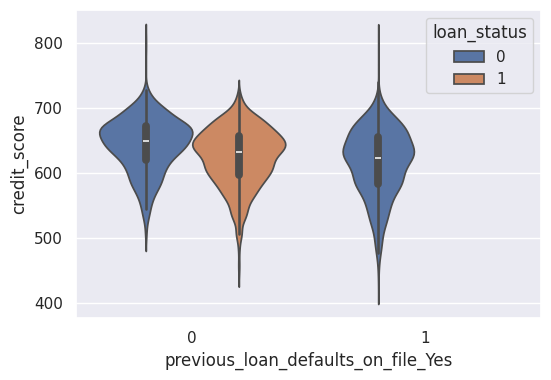

In [ ]:
sns.set(rc={'figure.figsize':(6,4)})
sns.violinplot(df,x='previous_loan_defaults_on_file_Yes',y='credit_score',hue='loan_status')
plt.show()

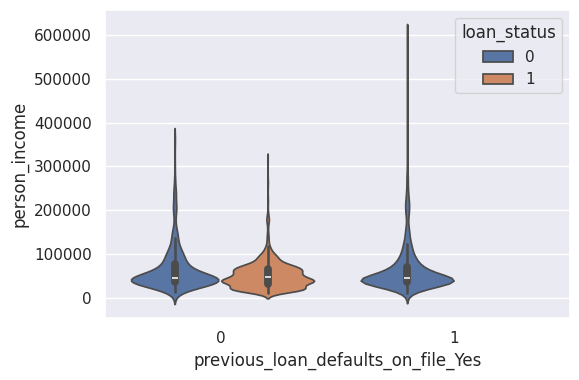

In [ ]:
sns.set(rc={'figure.figsize':(6,4)})
sns.violinplot(df,x='previous_loan_defaults_on_file_Yes',y='person_income',hue='loan_status')
plt.show()

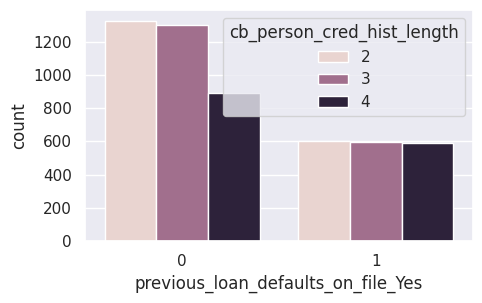

In [92]:
sns.set(rc={'figure.figsize':(5,3)})
sns.countplot(df,x='previous_loan_defaults_on_file_Yes',hue='cb_person_cred_hist_length')
plt.show()

In [ ]:
df['person_age'].value_counts()

,count
person_age,
23,1193
22,1179
24,1078
25,823
26,522
21,512
20,3


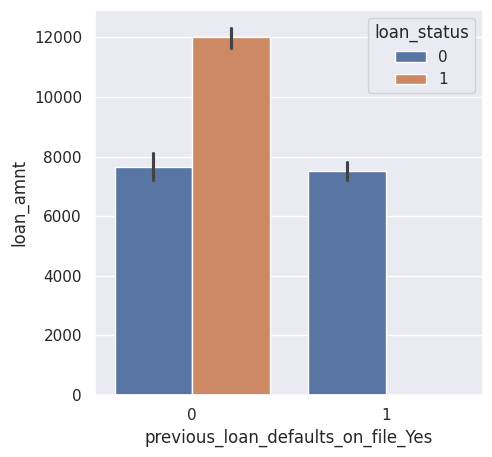

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(df,x='previous_loan_defaults_on_file_Yes',y='loan_amnt',hue='loan_status')
plt.show()

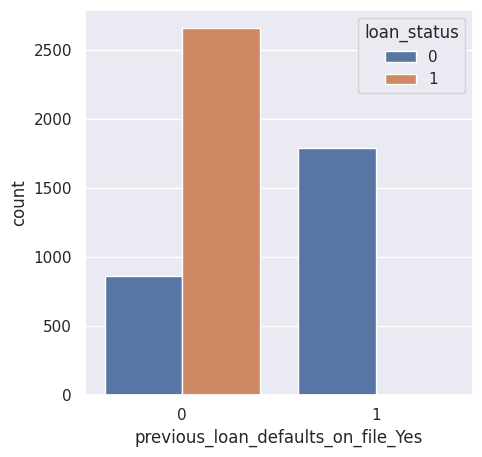

In [ ]:
sns.countplot(df,x='previous_loan_defaults_on_file_Yes',hue='loan_status')
plt.show()

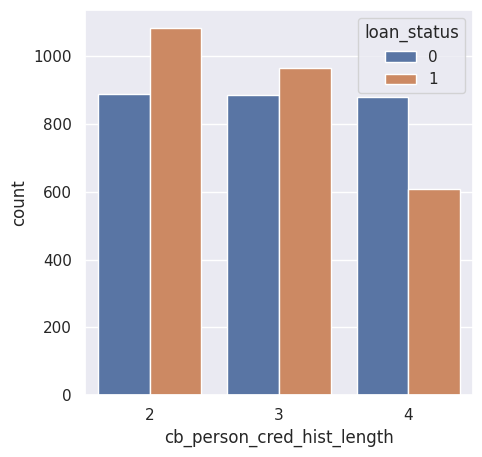

In [ ]:
sns.countplot(df,x='cb_person_cred_hist_length',hue='loan_status')
plt.show()

In [ ]:
df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_male,previous_loan_defaults_on_file_Yes,...,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_status
0,22,71948,0,35000,16.02,0.49,3,561,0,0,...,0,0,1,0,0,0,0,1,0,1
1,21,12282,0,1000,11.14,0.08,2,504,0,1,...,0,1,0,0,1,0,0,0,0,0
2,25,12438,3,5500,12.87,0.44,3,635,0,0,...,0,0,0,0,0,0,1,0,0,1
3,23,79753,0,35000,15.23,0.44,2,675,0,0,...,0,0,1,0,0,0,1,0,0,1
4,24,66135,1,35000,14.27,0.53,4,586,1,0,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5310 entries, 0 to 5313
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   person_age                          5310 non-null   int64  
 1   person_income                       5310 non-null   int64  
 2   person_emp_exp                      5310 non-null   int64  
 3   loan_amnt                           5310 non-null   int64  
 4   loan_int_rate                       5310 non-null   float64
 5   loan_percent_income                 5310 non-null   float64
 6   cb_person_cred_hist_length          5310 non-null   int64  
 7   credit_score                        5310 non-null   int64  
 8   person_gender_male                  5310 non-null   int64  
 9   previous_loan_defaults_on_file_Yes  5310 non-null   int64  
 10  person_education_Associate          5310 non-null   int64  
 11  person_education_Bachelor           5310 non-nul